In [5]:
!pip install autolab_core

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [7]:
%pip install autolab_core

  Using cached autolab_core-1.1.1-py3-none-any.whl (116 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 14.3 MB/s eta 0:00:0000:0100:01
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 3.4 MB/s eta 0:00:00
  Using cached opencv_python-4.6.0.66-cp36-abi3-macosx_10_15_x86_64.whl (46.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully uninstalled dill-0.3.5.1

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kern

In [11]:
%pip install yumirws

ERROR: Could not find a version that satisfies the requirement yumirws (from versions: none)
ERROR: No matching distribution found for yumirws

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from autolab_core import RigidTransform,RgbdImage,DepthImage,ColorImage, CameraIntrinsics
import numpy as np
import matplotlib.pyplot as plt
#from ../../cable_untangling.tcps import *
#from ../../cable_untangling.grasp import Grasp,GraspSelector
import time
import os
import sys
# cable = os.path.dirname(os.path.abspath(__file__)) + "/../../cable_untangling"
# sys.path.insert(0,cable)
# from interface_rws import Interface 
# from tcps import *
# from grasp import Grasp, GraspSelector
from PIL import Image, ImageFilter
import cv2

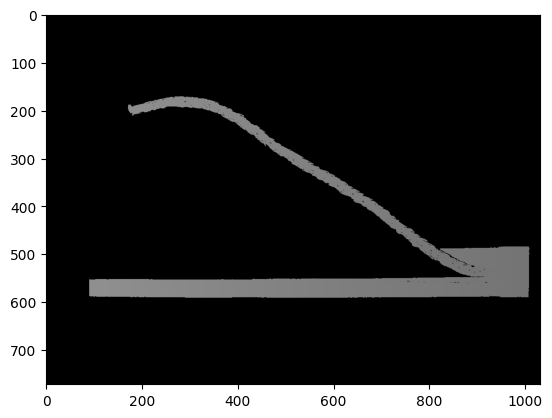

In [13]:
p = image_path = "edge_detection.png"
img_np = plt.imread(image_path)
img = Image.open(p)
plt.imshow(img)

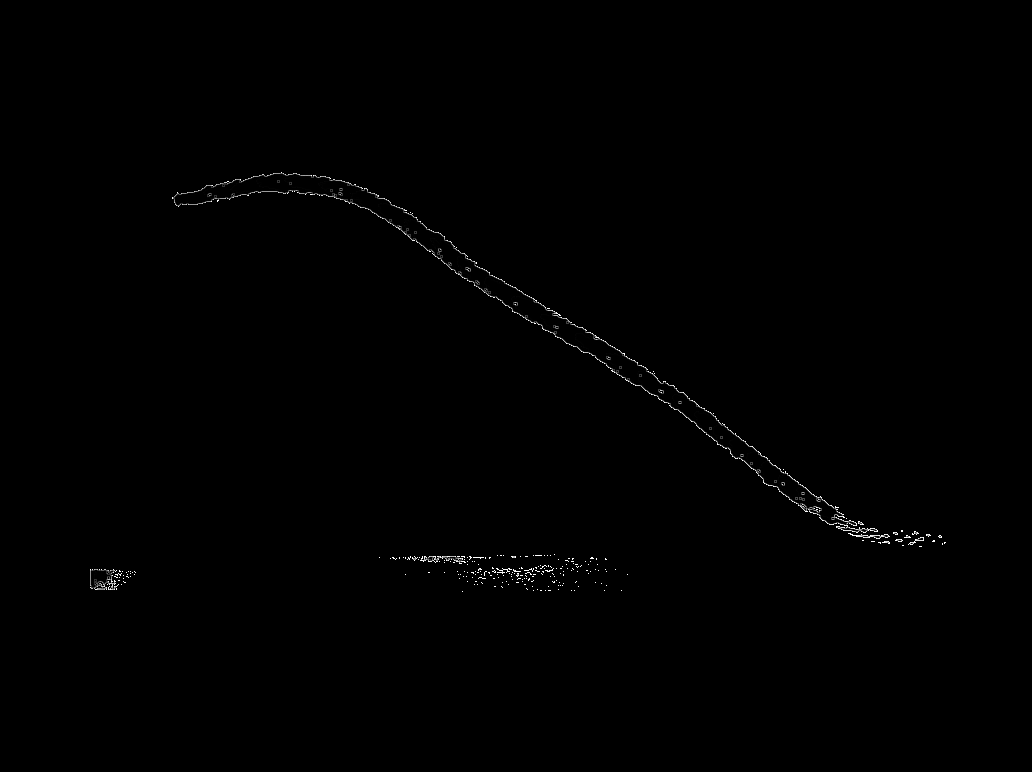

In [152]:
img_skeleton = img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,
                                          -1, -1, -1, -1), 1, 0))
img_skeleton

In [14]:
# convert to CV_8UC1
img_skeleton = np.array(img)
img_skeleton = cv2.cvtColor(img_skeleton, cv2.COLOR_RGB2GRAY)
# img_skeleton = cv2.threshold(img_skeleton, 0, 255, cv2.THRESH_BINARY)[1]

In [16]:
features = cv2.goodFeaturesToTrack(img_skeleton, 2, 0.01, 10)
features

array([[[290., 183.]],

       [[439., 250.]]], dtype=float32)

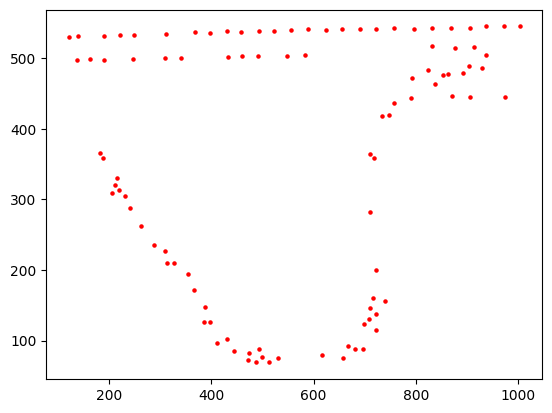

In [ ]:
# plot scatter of features
plt.scatter(features[:, 0], features[:, 1], c='r', s=5)

290 183
439 250


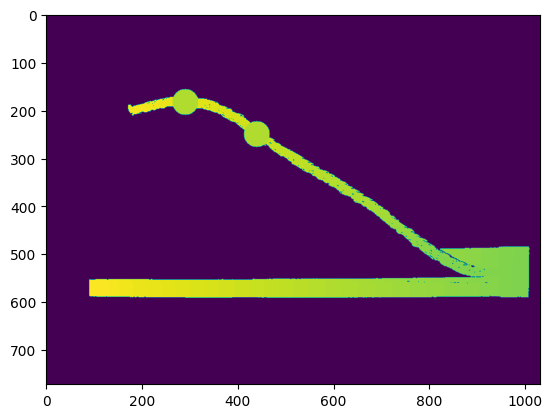

In [17]:
# img = cv2.imread(p, 0)
# cv2.goodFeaturesToTrack(img, maxCorners=5, qualityLevel=.01, minDistance=10, useHarrisDetector=True)
for (x, y) in features[:, 0].astype("int0"):
    cv2.circle(img_skeleton, (x, y), 27, 127, -1)
    print(x, y)

plt.imshow(img_skeleton)

In [156]:
    def find_endpoints(img):
    # find the end of the rope in the image
    # img is a 3d numpy array
    # where the third dim is (r,g,b)
    # return the endpoints of the rope
    # as a tuple of (x,y) coordinates
    # in the image
    edges = []
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i,j,0] == 0:
                if img[i-1,j,0] == 255 or img[i+1,j,0] == 255 or img[i,j-1,0] == 255 or img[i,j+1,0] == 255:
                    edges.append((i,j))
    return edges

find_endpoints(img)

IndentationError: expected an indented block after function definition on line 1 (638050038.py, line 8)

: 

In [21]:
img

(0.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [7]:
import cv2

skeleton = img[:,:,0]

# Threshold the image so that white pixels get a value of 0 and
# black pixels a value of 10:
_, binaryImage = cv2.threshold(skeleton, 128, 10, cv2.THRESH_BINARY)

# Set the end-points kernel:
h = np.array([[1, 1, 1],
              [1, 10, 1],
              [1, 1, 1]])

# Convolve the image with the kernel:
imgFiltered = cv2.filter2D(binaryImage, -1, h)

# Extract only the end-points pixels, those with
# an intensity value of 110:
endPointsMask = np.where(imgFiltered == 110, 255, 0)

# The above operation converted the image to 32-bit float,
# convert back to 8-bit uint
endPointsMask = endPointsMask.astype(np.uint8)

In [8]:
# RGB copy of this:
rgbMask = endPointsMask.copy()
rgbMask = cv2.cvtColor(rgbMask, cv2.COLOR_GRAY2BGR)

# Create a copy of the mask for points processing:
groupsMask = endPointsMask.copy()

# Set kernel (structuring element) size:
kernelSize = 3
# Set operation iterations:
opIterations = 3
# Get the structuring element:
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
# Perform dilate:
groupsMask = cv2.morphologyEx(groupsMask, cv2.MORPH_DILATE, maxKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

In [9]:
groupsMask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
# Set the centroids Dictionary:
centroidsDictionary = {}

# Get centroids on the end points mask:
totalComponents, output, stats, centroids = cv2.connectedComponentsWithStats(endPointsMask, connectivity=8)

# Count the blob labels with this:
labelCounter = 1

# Loop through the centroids, skipping the background (0):
for c in range(1, len(centroids), 1):

    # Get the current centroids:
    cx = int(centroids[c][0])
    cy = int(centroids[c][1])

    # Get the pixel value on the groups mask:
    pixelValue = groupsMask[cy, cx]

    # If new value (255) there's no entry in the dictionary
    # Process a new key and value:
    if pixelValue == 255:

        # New key and values-> Centroid and Point Count:
        centroidsDictionary[labelCounter] = (cx, cy, 1)

        # Flood fill at centroid:
        cv2.floodFill(groupsMask, mask=None, seedPoint=(cx, cy), newVal=labelCounter)
        labelCounter += 1

    # Else, the label already exists and we must accumulate the
    # centroid and its count:
    else:

        # Get Value:
        (accumCx, accumCy, blobCount) = centroidsDictionary[pixelValue]

        # Accumulate value:
        accumCx = accumCx + cx
        accumCy = accumCy + cy
        blobCount += 1

        # Update dictionary entry:
        centroidsDictionary[pixelValue] = (accumCx, accumCy, blobCount)

centroids

array([[515.5, 385.5]])

In [13]:
inputImage = img
scalePercent = 50  # percent of original size
width = int(inputImage.shape[1] * scalePercent / 100)
height = int(inputImage.shape[0] * scalePercent / 100)

# New dimensions:
dim = (width, height)

# resize image
resizedImage = cv2.resize(inputImage, dim, interpolation=cv2.INTER_AREA)

# Color conversion
grayscaleImage = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2GRAY)
grayscaleImage = 255 - grayscaleImage

In [14]:
# Loop trough the dictionary and get the final centroid values:
for k in centroidsDictionary:
    # Get the value of the current key:
    (cx, cy, count) = centroidsDictionary[k]
    # Process combined points:
    if count != 1:
        cx = int(cx/count)
        cy = int(cy/count)
    # Draw circle at the centroid
    cv2.circle(resizedImage, (cx, cy), 5, (0, 0, 255), -1)

cv2.imshow("Final Centroids", resizedImage)
cv2.waitKey(0)

32

In [47]:
max_val = 0
for r in range(len(img_2d)):
    for c in range(len(img_2d[r])):
        if img_2d[r][c] > max_val:
            max_val = img_2d[r][c]
print(max_val)

0.5647059281667074


In [67]:
# Get the edges
edges = cv2.Canny(img_2d, 0, 0.5*max_val)
plt.imshow(edges, interpolation="nearest")

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'


In [68]:
import cv2 as cv

input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")
kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")
output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)
rate = 50
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)
kernel = cv.resize(kernel, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("kernel", kernel)
cv.moveWindow("kernel", 0, 0)
input_image = cv.resize(input_image, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Original", input_image)
cv.moveWindow("Original", 0, 200)
output_image = cv.resize(output_image, None , fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Hit or Miss", output_image)
cv.moveWindow("Hit or Miss", 500, 200)
cv.waitKey(0)
cv.destroyAllWindows()

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-macosx_10_15_x86_64.whl (56.1 MB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip

[notic

ModuleNotFoundError: No module named 'cv2.ximgproc'

'4.6.0'